In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage import metrics


range_start = 5
range_end = 190

fake_dirs = ['results/psnr/fake_B_{}'.format(i) for i in range(range_start, range_end, 5)]

images = ['chapter_10_5', 'chapter_13_14', 'chapter_106_6', 'chapter_131_0']


gts = [ np.asarray(Image.open('datasets/sample/trainB/'+image+'.jpg').resize((256, 256))) for image in images]
images = [[ np.asarray(Image.open(fake+'/'+image+'.png')) for fake in fake_dirs ] for image in images]


psnr = []
ssim = []
hist_r = []
hist_g = []
hist_b = []


for i, gt in enumerate(gts):
    actual_psnr = []
    actual_ssim = []
    actual_hist_r = []
    actual_hist_g = []
    actual_hist_b = []

    for j in range(len(images[i])):

        psnr_value = metrics.peak_signal_noise_ratio(gt, images[i][j])
        ssim_value = metrics.structural_similarity(gt, images[i][j], multichannel=True)

        color = ('b','g','r')
        gt_hst = {}
        img_hst = {}
        for channel,col in enumerate(color):
            gt_hst[col] = cv2.calcHist([gt],[channel],None,[256],[0,256])
            img_hst[col] = cv2.calcHist([images[i][j]],[channel],None,[256],[0,256])

        hist_value_b = cv2.compareHist(gt_hst['b'], img_hst['b'], cv2.HISTCMP_BHATTACHARYYA )
        hist_value_g = cv2.compareHist(gt_hst['g'], img_hst['g'], cv2.HISTCMP_BHATTACHARYYA )
        hist_value_r = cv2.compareHist(gt_hst['r'], img_hst['r'], cv2.HISTCMP_BHATTACHARYYA )

        actual_psnr.append(psnr_value)
        actual_ssim.append(ssim_value)
        actual_hist_r.append(hist_value_r)
        actual_hist_g.append(hist_value_g)
        actual_hist_b.append(hist_value_b)


    psnr.append(np.array(actual_psnr))
    ssim.append(np.array(actual_ssim))
    hist_r.append(np.array(actual_hist_r))
    hist_g.append(np.array(actual_hist_g))
    hist_b.append(np.array(actual_hist_b))



psnr = np.array(psnr)
ssim = np.array(ssim)
hist_r = np.array(hist_r)
hist_g = np.array(hist_g)
hist_b = np.array(hist_b)


avg_psnr = np.sum(psnr, axis=0)/len(images)
avg_ssim = np.sum(ssim, axis=0)/len(images)
avg_hist_r = np.sum(hist_r, axis=0)/len(images)
avg_hist_g = np.sum(hist_g, axis=0)/len(images)
avg_hist_b = np.sum(hist_b, axis=0)/len(images)


def avged(data, window_width):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

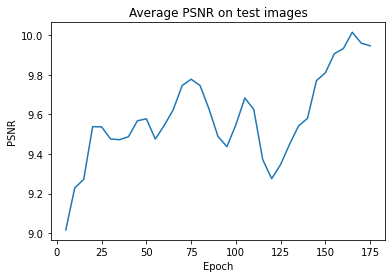

In [50]:
y = avged(avg_psnr, 3)
plt.plot([5*i for i in range(1,len(y) +1) ], y)
plt.title('Average PSNR on test images')
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.show()

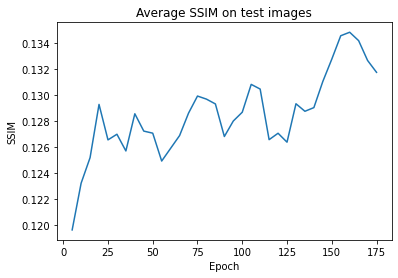

In [51]:
y = avged(avg_ssim, 3)
plt.plot([5*i for i in range(1,len(y) +1) ], y)
plt.title('Average SSIM on test images')
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()

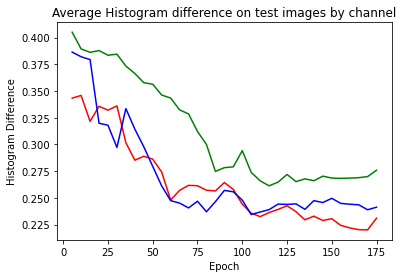

In [52]:

y = avged(avg_hist_r, 3)
plt.plot([5*i for i in range(1,len(y) +1) ], y, color='red')

y = avged(avg_hist_g, 3)
plt.plot([5*i for i in range(1,len(y) +1) ], y, color='green')

y = avged(avg_hist_b, 3)
plt.plot([5*i for i in range(1,len(y) +1) ], y, color='blue')

plt.title('Average Histogram difference on test images by channel')
plt.xlabel('Epoch')
plt.ylabel('Histogram Difference')
plt.show()